 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [227]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [228]:
# Create the Path for whale returns
whalecsv = Path("/Users/jennmacbookpro/Desktop/FinTechCourse/Week 4 - Pandas/Unit 4 Homework/Instructions/Starter_Code/Resources/whale_returns.csv")

In [229]:
# Reading whale returns
whale_df = pd.read_csv(whalecsv, index_col='Date', infer_datetime_format=True, parse_dates=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [230]:
# Sort data by date
whale_df = whale_df.sort_index()
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [231]:
# Count (use sum) nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [232]:
# Drop nulls
whale_df = whale_df.dropna()
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


In [233]:
# Check to ensure no more nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [234]:
# Create the Algorithmic Returns Path
algopath = Path("/Users/jennmacbookpro/Desktop/FinTechCourse/Week 4 - Pandas/Unit 4 Homework/Instructions/Starter_Code/Resources/algo_returns.csv")

In [235]:
# Reading algorithmic returns
algo_df = pd.read_csv(algopath, index_col='Date', infer_datetime_format=True, parse_dates=True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [236]:
# Sort the data by Date
algo_df = algo_df.sort_index()
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [237]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [238]:
# Drop nulls
algo_df = algo_df.dropna()
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


In [239]:
# Check no more nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [240]:
# Setting path for SP60
sptsxcsv = Path("/Users/jennmacbookpro/Desktop/FinTechCourse/Week 4 - Pandas/Unit 4 Homework/Instructions/Starter_Code/Resources/sp_tsx_history.csv")

In [241]:
# Reading S&P TSX 60 Closing Prices
sp_tsx_df = pd.read_csv(sptsxcsv, index_col='Date', infer_datetime_format=True, parse_dates=True)
sp_tsx_df.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [242]:
# Sort by date
sp_tsx_df = sp_tsx_df.sort_index()
sp_tsx_df.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [243]:
# Check Data Types
sp_tsx_df.dtypes

Close    object
dtype: object

In [244]:
# Remove $ signs and ,'s from 'Close'
sp_tsx_df['Close'] = sp_tsx_df['Close'].str.replace('$','')
sp_tsx_df['Close'] = sp_tsx_df['Close'].str.replace(',','')
sp_tsx_df.head()

/var/folders/g0/y9ttx8sd7r976z_f0l0m101c0000gn/T/ipykernel_1390/288735303.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp_tsx_df['Close'] = sp_tsx_df['Close'].str.replace('$','')


,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


In [245]:
# Fix Data Types
sp_tsx_df['Close'] = sp_tsx_df['Close'].astype(float)
sp_tsx_df.dtypes

Close    float64
dtype: object

In [246]:
# Calculate Daily Returns
sp_tsx_daily = sp_tsx_df.pct_change()
sp_tsx_daily.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [247]:
# Drop nulls
sp_tsx_daily = sp_tsx_daily.dropna()
sp_tsx_daily.head()

,Close
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


In [248]:
# Rename `Close` Column to be specific to this portfolio.
sp_tsx_daily.columns = ['S&P TSX']
sp_tsx_daily.head()

,S&P TSX
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [249]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([whale_df, algo_df, sp_tsx_daily], axis='columns', join='inner')
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


In [250]:
# Ensure all data is sorted by Date
combined_df = combined_df.sort_index()
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

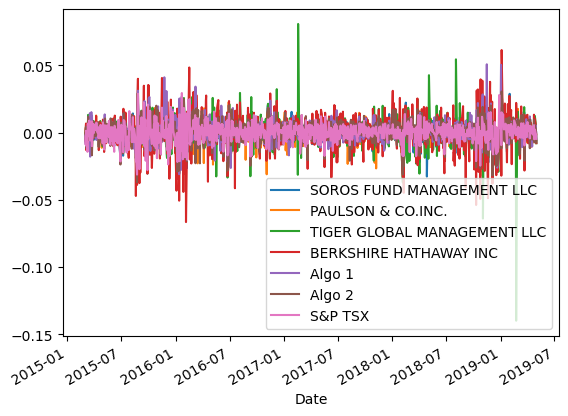

In [251]:
# Plot daily returns of all portfolios
combined_df.plot()

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

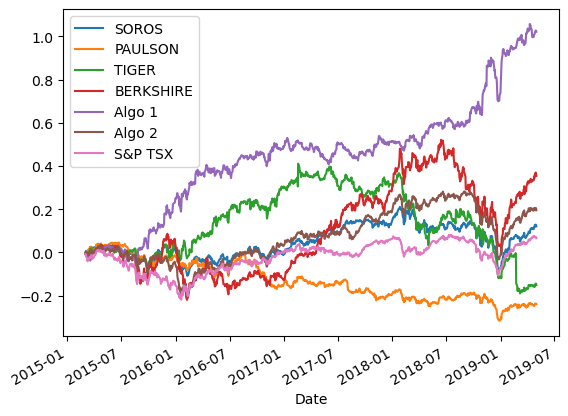

In [252]:
# Calculate cumulative returns of all portfolios
combined_cumulative = (1 + combined_df).cumprod() - 1

# Update column titles to make them more readable
combined_cumulative.columns = ['SOROS', 'PAULSON', 'TIGER', 'BERKSHIRE', 'Algo 1', 'Algo 2', 'S&P TSX']

# Plot cumulative returns
combined_cumulative.plot()

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:>

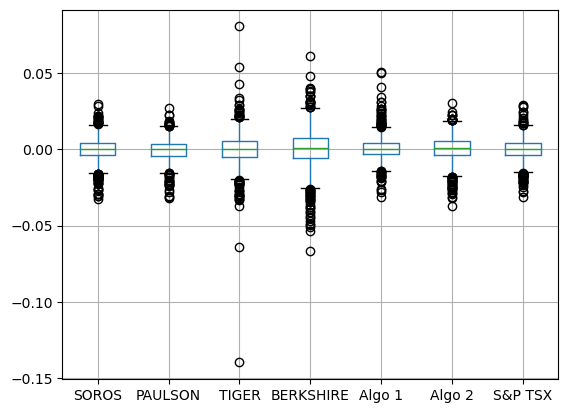

In [253]:
# Box plot to visually show risk
# Update column titles to make them more readable
combined_df.columns = ['SOROS', 'PAULSON', 'TIGER', 'BERKSHIRE', 'Algo 1', 'Algo 2', 'S&P TSX']
combined_df.boxplot()

### Calculate Standard Deviations

In [254]:
# Calculate the daily standard deviations of all portfolios
all_std = combined_df.std()
all_std

SOROS        0.007828
PAULSON      0.006982
TIGER        0.010883
BERKSHIRE    0.012826
Algo 1       0.007589
Algo 2       0.008326
S&P TSX      0.007034
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [255]:
# Calculate the daily standard deviation of S&P TSX 60
sptsx_std = combined_df['S&P TSX'].std()
print(f'The standard deviation of the S&S TSX60 is: {sptsx_std}')

The standard deviation of the S&S TSX60 is: 0.007034167748577725


In [256]:
# Determine which portfolios are riskier than the S&P TSX 60
riskier_portfolios = all_std[all_std > sptsx_std]
riskier_portfolios
print(f'These portfolios are riskier than the S&P TSX 60:\n{riskier_portfolios}')

These portfolios are riskier than the S&P TSX 60:
SOROS        0.007828
TIGER        0.010883
BERKSHIRE    0.012826
Algo 1       0.007589
Algo 2       0.008326
dtype: float64


### Calculate the Annualized Standard Deviation

In [257]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = all_std * np.sqrt(252)
annualized_std

SOROS        0.124259
PAULSON      0.110841
TIGER        0.172759
BERKSHIRE    0.203599
Algo 1       0.120470
Algo 2       0.132177
S&P TSX      0.111664
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

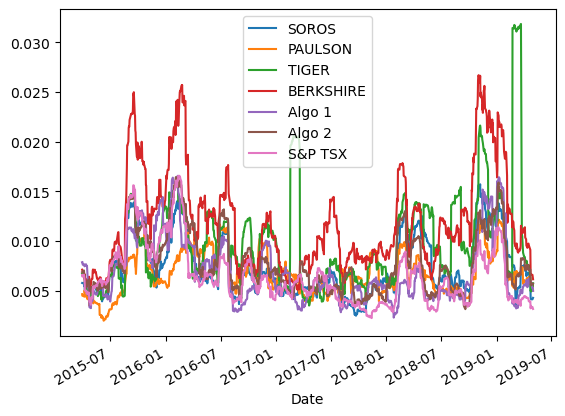

In [258]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_21_day_std = combined_df.rolling(window=21).std()

# Plot the rolling standard deviation
rolling_21_day_std.plot()

### Calculate and plot the correlation

In [259]:
# Calculate the correlation
corelation = combined_df.corr()

# Display the correlation matrix
corelation

,SOROS,PAULSON,TIGER,BERKSHIRE,Algo 1,Algo 2,S&P TSX
SOROS,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
S&P TSX,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


<AxesSubplot:>

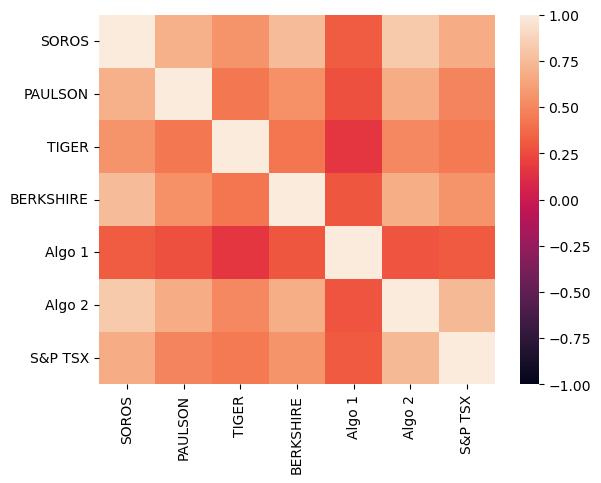

In [260]:
# Plot a Heatmap
sns.heatmap(corelation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

<AxesSubplot:xlabel='Date'>

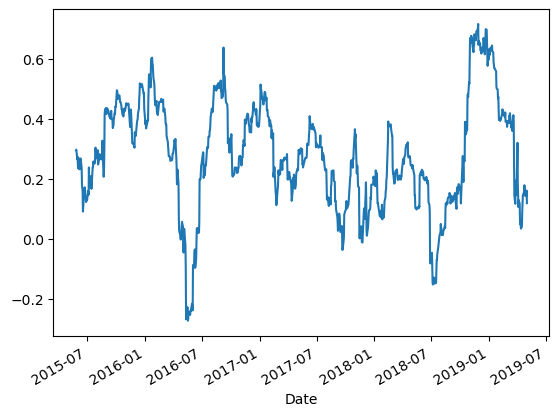

In [261]:
# CHOOSE ALGO 1 AS PREFERRED STOCK

# Calculate covariance of a single portfolio for a 60-Day Rolling
covariance = combined_df['Algo 1'].rolling(window=60).cov(combined_df['S&P TSX'])

# Calculate variance of S&P TSX for a 60-Day Rolling
variance = combined_df['S&P TSX'].rolling(window=60).var()

# Computing 60-Day rolling beta
algo_1_beta = covariance / variance

# Plot beta trend
algo_1_beta.plot()

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [262]:
# Use `ewm` to calculate the rolling window
exponetially_weighted_std = combined_df.ewm(halflife=21).std()
exponetially_weighted_std

,SOROS,PAULSON,TIGER,BERKSHIRE,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,0.002472,0.005814,0.001441,0.007624,0.004700,0.002380,0.003648
2015-03-05,0.002677,0.004968,0.002478,0.007020,0.004162,0.002662,0.004936
2015-03-06,0.005349,0.004615,0.004665,0.009387,0.003419,0.007166,0.005205
2015-03-09,0.004638,0.004471,0.005496,0.008066,0.002999,0.006290,0.004517
...,...,...,...,...,...,...,...
2019-04-25,0.006819,0.006342,0.014811,0.010830,0.006526,0.007500,0.004700
2019-04-26,0.006819,0.006448,0.014764,0.010763,0.006433,0.007418,0.004628
2019-04-29,0.006708,0.006357,0.014575,0.010601,0.006378,0.007304,0.004564


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [263]:
# Annualized Sharpe Ratios
sharpe_ratios = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))
sharpe_ratios

SOROS        0.286709
PAULSON     -0.547594
TIGER       -0.144455
BERKSHIRE    0.467045
Algo 1       1.491514
Algo 2       0.396817
S&P TSX      0.195550
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

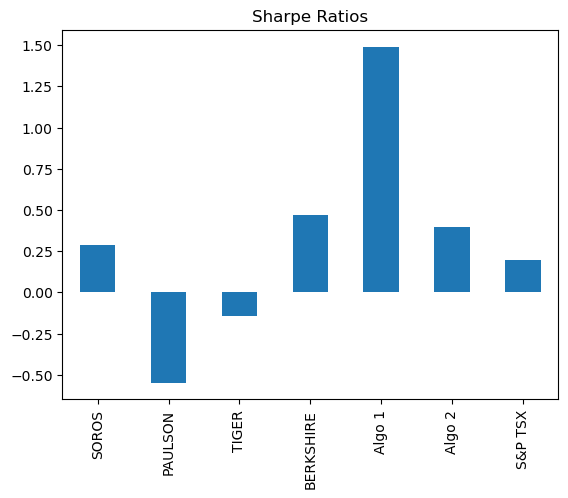

In [264]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Based on the Sharpe Ratio, both Algo 1 and Algo 2 outperformed the market in terms of the Risk / Reward tradeoff.  However, only Algo 1 outperformed all of the Whale Portfolios.  The Berkshire portfolio slightly outperformed the Algo 2 portfolio based purely on the Sharpe Ratio.  Based on this, the Algo portfolios are pretty good, however they both have a Sharpe Ratio under 1.5, so are not considered good investments since the risk is not being offset well enough by the return.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [265]:
# Setting Paths for the csv files
campbellpath = Path("/Users/jennmacbookpro/Desktop/FinTechCourse/Week 4 - Pandas/Unit 4 Homework/Stocks/Campbell Stock.csv")
fordpath = Path("/Users/jennmacbookpro/Desktop/FinTechCourse/Week 4 - Pandas/Unit 4 Homework/Stocks/Ford Stock.csv")
mcewenpath = Path("/Users/jennmacbookpro/Desktop/FinTechCourse/Week 4 - Pandas/Unit 4 Homework/Stocks/McEwen Stock.csv")
pfizerpath = Path("/Users/jennmacbookpro/Desktop/FinTechCourse/Week 4 - Pandas/Unit 4 Homework/Stocks/Pfizer Stock.csv")
teslapath = Path("/Users/jennmacbookpro/Desktop/FinTechCourse/Week 4 - Pandas/Unit 4 Homework/Stocks/Tesla Stock.csv")

In [266]:
# Reading the csv into DataFrames
campbell_df = pd.read_csv(campbellpath, index_col='Date', infer_datetime_format=True, parse_dates=True)
ford_df = pd.read_csv(fordpath, index_col='Date', infer_datetime_format=True, parse_dates=True)
mcewen_df = pd.read_csv(mcewenpath, index_col='Date', infer_datetime_format=True, parse_dates=True)
pfizer_df = pd.read_csv(pfizerpath, index_col='Date', infer_datetime_format=True, parse_dates=True)
tesla_df = pd.read_csv(teslapath, index_col='Date', infer_datetime_format=True, parse_dates=True)

In [267]:
# Combine all stocks in a single DataFrame
my_portfolio = pd.concat([campbell_df, ford_df, mcewen_df, pfizer_df, tesla_df], axis='columns', join='inner')
my_portfolio.head()

,Close,Close,Close,Close,Close
Date,,,,,
2015-01-02,44.00,15.36,11.0,29.68,14.62
2015-01-05,43.33,14.76,11.9,29.52,14.01
2015-01-06,43.04,14.62,12.7,29.77,14.09
2015-01-07,44.94,15.04,11.8,30.17,14.06
2015-01-08,45.53,15.42,11.4,30.79,14.04


In [268]:
# Update the column names to tie to the Stocks
my_portfolio.columns = ['CPB', 'F', 'MUX', 'PFE', 'TSLA']

# Ensure the data is sorted by date
my_portfolio = my_portfolio.sort_index()
my_portfolio.head()

,CPB,F,MUX,PFE,TSLA
Date,,,,,
2015-01-02,44.00,15.36,11.0,29.68,14.62
2015-01-05,43.33,14.76,11.9,29.52,14.01
2015-01-06,43.04,14.62,12.7,29.77,14.09
2015-01-07,44.94,15.04,11.8,30.17,14.06
2015-01-08,45.53,15.42,11.4,30.79,14.04


In [269]:
# Reset Date index
my_portfolio_returns = my_portfolio.pct_change()
my_portfolio_returns.head()

,CPB,F,MUX,PFE,TSLA
Date,,,,,
2015-01-02,NaN,NaN,NaN,NaN,NaN
2015-01-05,-0.015227,-0.039062,0.081818,-0.005391,-0.041724
2015-01-06,-0.006693,-0.009485,0.067227,0.008469,0.005710
2015-01-07,0.044145,0.028728,-0.070866,0.013436,-0.002129
2015-01-08,0.013129,0.025266,-0.033898,0.020550,-0.001422


In [270]:
# Drop NAs
my_portfolio_returns = my_portfolio_returns.dropna()

# Display sample data
my_portfolio_returns.head()

,CPB,F,MUX,PFE,TSLA
Date,,,,,
2015-01-05,-0.015227,-0.039062,0.081818,-0.005391,-0.041724
2015-01-06,-0.006693,-0.009485,0.067227,0.008469,0.005710
2015-01-07,0.044145,0.028728,-0.070866,0.013436,-0.002129
2015-01-08,0.013129,0.025266,-0.033898,0.020550,-0.001422
2015-01-09,-0.002855,-0.013619,0.008772,0.004547,-0.018519


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [271]:
# Set weights
weights = [1/5, 1/5, 1/5, 1/5, 1/5]

# Calculate portfolio return
my_portfolio_returns['My Portfolio'] = my_portfolio_returns.dot(weights)
my_portfolio_returns.head()

,CPB,F,MUX,PFE,TSLA,My Portfolio
Date,,,,,,
2015-01-05,-0.015227,-0.039062,0.081818,-0.005391,-0.041724,-0.003917
2015-01-06,-0.006693,-0.009485,0.067227,0.008469,0.005710,0.013046
2015-01-07,0.044145,0.028728,-0.070866,0.013436,-0.002129,0.002663
2015-01-08,0.013129,0.025266,-0.033898,0.020550,-0.001422,0.004725
2015-01-09,-0.002855,-0.013619,0.008772,0.004547,-0.018519,-0.004335


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [272]:
# Join your returns DataFrame to the original returns DataFrame
all_returns = pd.concat([combined_df, my_portfolio_returns['My Portfolio']], axis='columns', join='inner')
all_returns.head()

,SOROS,PAULSON,TIGER,BERKSHIRE,Algo 1,Algo 2,S&P TSX,My Portfolio
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530,-0.001224
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371,-0.010053
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344,-0.001945
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972,-0.020749
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555,-0.003619


In [273]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_returns = all_returns.dropna()
all_returns.head()

,SOROS,PAULSON,TIGER,BERKSHIRE,Algo 1,Algo 2,S&P TSX,My Portfolio
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530,-0.001224
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371,-0.010053
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344,-0.001945
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972,-0.020749
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555,-0.003619


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [274]:
# Calculate the annualized `std`
all_returns_std = all_returns.std() * np.sqrt(252)
all_returns_std

SOROS           0.124259
PAULSON         0.110841
TIGER           0.172759
BERKSHIRE       0.203599
Algo 1          0.120470
Algo 2          0.132177
S&P TSX         0.111664
My Portfolio    0.191683
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

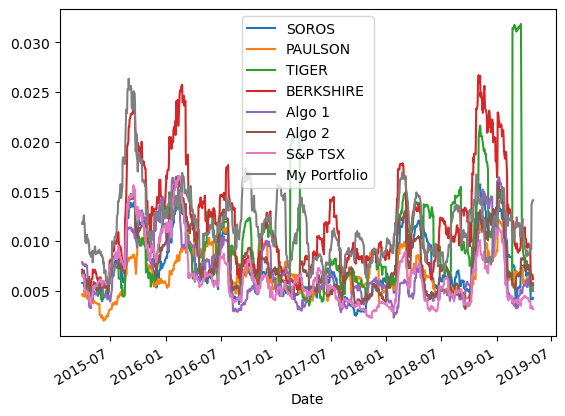

In [275]:
# Calculate rolling standard deviation
all_returns_21_rolling = all_returns.rolling(window=21).std()

# Plot rolling standard deviation
all_returns_21_rolling.plot()

### Calculate and plot the correlation

In [276]:
# Calculate and plot the correlation
corelation_all_returns = all_returns.corr()

# Display the correlation matrix
corelation_all_returns

,SOROS,PAULSON,TIGER,BERKSHIRE,Algo 1,Algo 2,S&P TSX,My Portfolio
SOROS,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930,0.463778
PAULSON,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511,0.397639
TIGER,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583,0.400774
BERKSHIRE,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250,0.377838
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276,0.212668
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370,0.494784
S&P TSX,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000,0.461446
My Portfolio,0.463778,0.397639,0.400774,0.377838,0.212668,0.494784,0.461446,1.000000


### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

<AxesSubplot:xlabel='Date'>

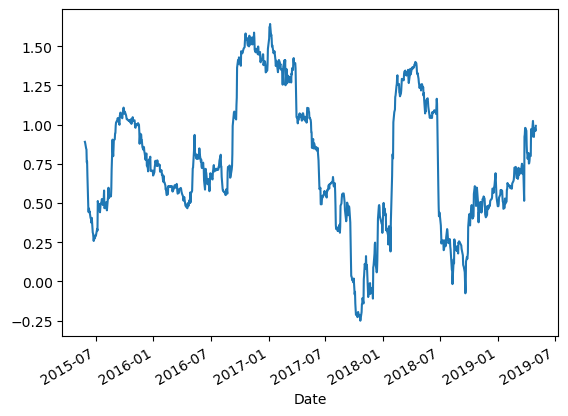

In [277]:
# Calculate and plot Beta

# Calculate covariance of a single portfolio for a 60-Day Rolling
covariance_portfolio = all_returns['My Portfolio'].rolling(window=60).cov(all_returns['S&P TSX'])

# Calculate variance of S&P TSX for a 60-Day Rolling - Calculated in prior analysis
variance

# Computing 60-Day rolling beta
my_portfolio_beta = covariance_portfolio / variance

# Plot beta trend
my_portfolio_beta.plot()

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [278]:
# Calculate Annualized Sharpe Ratios
sharpe_ratios_myportfolio = (all_returns.mean() * 252) / (all_returns.std() * np.sqrt(252))
sharpe_ratios_myportfolio

SOROS           0.286709
PAULSON        -0.547594
TIGER          -0.144455
BERKSHIRE       0.467045
Algo 1          1.491514
Algo 2          0.396817
S&P TSX         0.195550
My Portfolio    0.324913
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

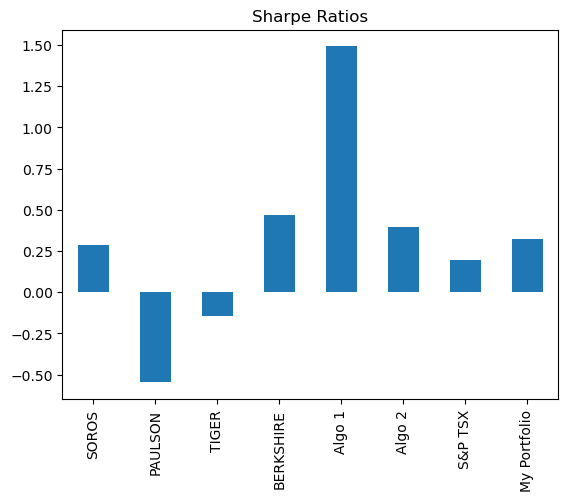

In [279]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios_myportfolio.plot(kind="bar", title="Sharpe Ratios")

### How does your portfolio do?

Based on the Sharpe Ratio, my portfolio performs ok vs the market.  My portfolio outperforms the S&P TSX as well as the SOROS portfolio, the Paulson Portfolio and the Tiger Portfolio.  However, it does not out perform the Berkshire Portfolio or the Algorithmic Portfolios.  Also, it still have a Sharpe Ratio under 1, so is not considered a good investment as the additional return does not outweight the additional risk.